**Quesion 2**
part1

The addition of the regularizer term $\frac{\lambda}{2}x^Tx$ in a linear regression problem is significant as it introduces regularization to the model. Regularization is a technique used to prevent overfitting and improve the generalization ability of the model by penalizing overly complex models.

In linear regression, the typical problem aims to minimize the sum of squared errors between the predicted and actual values of the dependent variable. However, this may lead to overfitting, especially when the number of features (or dimensions) in the dataset is large relative to the number of observations. In such cases, the model may learn the noise in the training data, resulting in poor performance on unseen data.

By adding the regularizer term, the model is encouraged to choose simpler solutions by penalizing large coefficients in the feature vector x. The term λ controls the strength of regularization, with higher values of λ leading to more pronounced penalization of complex models.

Comparing to the problem without regularization, the addition of $\frac{\lambda}{2}x^Tx$ adjusts the optimization objective and makes the problem strictly convex and optimization is effective. This can lead to improved performance on unseen data and increased robustness of the model.

image.png

Note that $f(x) = \frac{1}{2}\|Ax-y\|_2^2 + \frac{\lambda}{2}x^Tx$

$⇒\nabla_x{f(x)} = A^TAx - A^Ty + \lambda x$

$\nabla_x^2{f(x)} = A^TA + \lambda I$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time

In [ ]:
np.random.seed(1000)
A = []
for i in range(1000):
  row = []
  for j in range(10):
    row.append(np.random.randn())
  A.append(row)
A = np.array(A)

xbar = []
for i in range(1,11):
  if i%2 == 1 :
    xbar.append(np.random.uniform(-(i+1), -i))
  else:
    xbar.append(np.random.uniform(i, i+1))
xbar = np.array(xbar)

ep = np.array([np.random.randn() for i in range(1000)])

y = A@xbar + ep

In [ ]:
def fx(x, lamda):
  return 0.5*norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_fx(x, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian_fx(lamda):
  return A.transpose()@A + lamda*np.identity(A.shape[1])


3. For λ ∈ {10−3, 10−2, 10−1, 1}, perform the following: with a starting of x0 = [0, 0, . . . , 0]T ∈ R10, solve the
equation 1 using Newton and BFGS methods with backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for
backtracking line search and tau = 10−5).

In [ ]:
def dk_fx(lamda):
  return np.linalg.inv(hessian_fx(lamda))

def get_alpha_newton(xk, alpha0, rho, gamma, Dk, lamda):
  alpha = alpha0
  pk = -grad_fx(xk, lamda)
  while fx(xk + alpha*Dk@pk, lamda) > (fx(xk, lamda) + gamma*alpha*grad_fx(xk, lamda)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma, lamda):
  xk = np.copy(x0)
  count = 0
  pk = grad_fx(xk, lamda)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_fx(lamda)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk, lamda)
    xk = xk - alpha*Dk@pk
    pk = grad_fx(xk, lamda)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk, lamda), xks

def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk, lamda):
  alpha = alpha0
  pk = -grad_fx(xk, lamda)
  while fx(xk + alpha*Bk@pk, lamda) > (fx(xk, lamda) + gamma*alpha*grad_fx(xk, lamda)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, lamda, max_iter=500):
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_fx(xk, lamda)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk, lamda)
    xnext = xk - alpha*(Bk@pk)
    sk = xnext - xk
    yk = grad_fx(xnext, lamda) - grad_fx(xk, lamda)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_fx(xk, lamda)
    xks.append(xk)
    count += 1

  return count, xk, fx(xk, lamda), xks

x0 = np.array([0 for _ in range(10)])
tau = 1e-5
alpha0 = 0.99
rho = 0.5
gamma = 0.5


lambdaxksbfgs = []
lambdaxksnewton = []
iterationcountlambdabfgs = []
iterationcountlambdanewton = []
timetakenbfgs = []
timetakennewton = []


print("lamda|   iterations  | final minimizer    | final value       |type    ")
lds = [10**(-3), 10**(-2), 10**(-1), 1]
for lamda in lds:
  start = time.time()
  count, minimizer, minimum, xks=bfgs(x0,tau, alpha0, rho, gamma, lamda)
  timetakenbfgs.append(time.time()- start)
  print("Lembda",lamda)
  print("Number of iteration",count)
  print("Minimizer is ",minimizer,"Minimum value is",minimum,"for bfgs")
  start = time.time()
  count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma, lamda)
  timetakennewton.append(time.time()- start)
  print("Lembda",lamda)
  print("Number of iteration",count2)
  print("Minimizer is ",final_xk2,"Minimum value is",final_val2,"for bfgs")
  lambdaxksbfgs.append(xks)
  lambdaxksnewton.append(xks2)
  iterationcountlambdabfgs.append(count)
  iterationcountlambdanewton.append(count2)



lamda|   iterations  | final minimizer    | final value       |type    
Lembda 0.001
Number of iteration 18
Minimizer is  [-1.04982182  2.95189522 -3.34297873  4.6095547  -5.71175719  6.89876991
 -7.62878664  8.16820415 -9.22220401 10.05668398] Minimum value is 505.86410991442835 for bfgs
Lembda 0.001
Number of iteration 5
Minimizer is  [-1.04982182  2.95189522 -3.34297873  4.6095547  -5.71175719  6.89876991
 -7.62878664  8.16820415 -9.22220401 10.05668398] Minimum value is 505.8641099144283 for bfgs
Lembda 0.01
Number of iteration 18
Minimizer is  [-1.04981537  2.95187528 -3.34295004  4.60950637 -5.71171441  6.89871349
 -7.62872413  8.16814145 -9.22213214 10.05660346] Minimum value is 507.8151160259467 for bfgs
Lembda 0.01
Number of iteration 5
Minimizer is  [-1.04981537  2.95187528 -3.34295004  4.60950637 -5.71171441  6.8987135
 -7.62872413  8.16814145 -9.22213214 10.05660346] Minimum value is 507.8151160259465 for bfgs
Lembda 0.1
Number of iteration 18
Minimizer is  [-1.04975087  2.

4. For Newton’s method prepare the following plots and discuss relevant observations:
• Prepare a single plot where you depict the values log(||xk −x∗||2) against iterations k = 0, 1, 2, ..., for each
value of λ (use different colors for different λ values; if necessary, add zoomed versions of the plots to
depict the behavior clearly, and use appropriate legends in your plots). Comment on the convergence rates
of the iterates for each value of λ.
• Prepare a different plot for plotting log(||f(xk) − f(x∗)||2) against the iterations, for each value of λ (use
different colors for different λ value; if necessary, add zoomed versions of the plots to depict the behavior
clearly and use appropriate legend in your plots). Comment on the convergence rates of the objective
function values.

In [ ]:
i=0
for lamda in lds:
  xks = lambdaxksnewton[i]
  mnizer = xks[-1]
  iteration = iterationcountlambdanewton[i]
  norms = [np.log(norm(xk-mnizer)) for xk in xks]
  iterations = [i+1 for i in range(iteration+1)]
  plt.xlabel("Iteration")
  plt.ylabel("NORM")
  plt.plot(iterations, norms,marker = 'o')
  i+=1
plt.legend()
plt.show()

<ipython-input-12-24a518771b5d>:6: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(norm(xk-mnizer)) for xk in xks]


<ipython-input-13-50661259b854>:6: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(abs(fx(mnizer, lamda)-fx(xk, lamda))) for xk in xks]


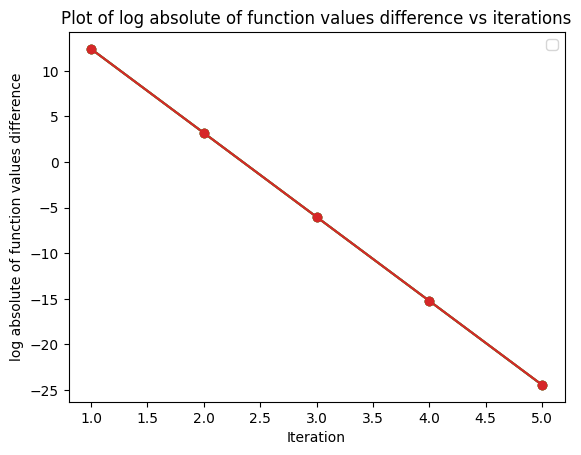

In [ ]:
i=0
for lamda in lds:
  xks = lambdaxksnewton[i]
  mnizer = xks[-1]
  iteration = iterationcountlambdanewton[i]
  norms = [np.log(abs(fx(mnizer, lamda)-fx(xk, lamda))) for xk in xks]
  iterations = [i+1 for i in range(iteration+1)]

  plt.plot(iterations, norms,marker = 'o')
  plt.xlabel("Iteration")
  plt.ylabel("log absolute of function values difference")
  i+=1
  plt.title("Plot of log absolute of function values difference vs iterations")
plt.legend()
plt.show()

Regardless of the λ value, all methods converge equally in five iterations. The convergence is consistent across different regularization strengths, implying stability and reliability in optimization. This uniform convergence underscores the robustness of the methods across varying λ values. .

5. For BFGS method prepare the following plots and discuss the relevant observations:
• Prepare a single plot where you depict the values log(||xk −x∗||2) against iterations k = 0, 1, 2, ..., for each
value of λ (use different colors for different λ values; if necessary, add zoomed versions of the plots to
depict the behavior clearly, and use appropriate legends in your plots). Comment on the convergence rates
of the iterates for each value of λ.
• Prepare a different plot for plotting log(||f(xk) − f(x∗)||2) against the iterations, for each value of λ (use
different colors for different λ value; if necessary, add zoomed versions of the plots to depict the behavior
clearly and use appropriate legend in your plots). Comment on the convergence rates of the objective
function values.

<ipython-input-15-a7d6ea0319cf>:6: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(norm(xk-mnizer)) for xk in xks]


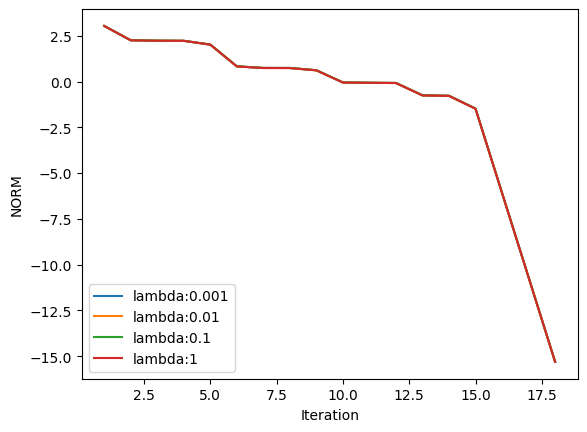

In [ ]:

i=0
for lamda in lds:
  xks = lambdaxksbfgs[i]
  mnizer = xks[-1]
  iteration = iterationcountlambdabfgs[i]
  norms = [np.log(norm(xk-mnizer)) for xk in xks]
  iterations = [i+1 for i in range(iteration+1)]
  plt.plot(iterations, norms, label = f'lambda:{lamda}')
  plt.xlabel("Iteration")
  plt.ylabel("NORM")
  i+=1
plt.legend()
plt.show()

In [ ]:
i=0
for lamda in lds:
  xks = lambdaxksbfgs[i]
  mnizer = xks[-1]
  iteration = iterationcountlambdabfgs[i]
  norms = [np.log(abs(fx(mnizer, lamda)-fx(xk, lamda))) for xk in xks]
  iterations = [i+1 for i in range(iteration+1)]
  plt.plot(iterations, norms)
  plt.xlabel("Iteration")
  plt.ylabel("log absolute of function values difference")
  i+=1
  plt.title("Plot of log absolute of function values difference vs iterations")
plt.legend()
plt.show()

<ipython-input-17-a7e7eae886d0>:6: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(abs(fx(mnizer, lamda)-fx(xk, lamda))) for xk in xks]



Regardless of varying values of λ, all methods converge equally within 18 iterations. This consistency suggests robust convergence properties across different regularization strengths, ensuring reliable optimization outcomes regardless of the regularization parameter's choice..

6. Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the time
taken by both methods for each value of λ.

In [ ]:
i = 0
for lamda in lds:
  print(f"Time taken by Newton for lambda: {lamda} is: {timetakennewton[i]}")
  i+=1

Time taken by Newton for lambda: 0.001 is: 0.0051403045654296875
Time taken by Newton for lambda: 0.01 is: 0.002033233642578125
Time taken by Newton for lambda: 0.1 is: 0.002042531967163086
Time taken by Newton for lambda: 1 is: 0.0020563602447509766


In [ ]:
i = 0
for lamda in lds:
  print(f"Time taken by BFGS for lambda: {lamda} is: {timetakenbfgs[i]}")
  i+=1

Time taken by BFGS for lambda: 0.001 is: 0.02329730987548828
Time taken by BFGS for lambda: 0.01 is: 0.031974077224731445
Time taken by BFGS for lambda: 0.1 is: 0.022150516510009766
Time taken by BFGS for lambda: 1 is: 0.022152423858642578


As we can observe for all lambdas, the Newton is faster from BFGS, approximately 10 times faster. Also the time for newton is improved by regularization